In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=7
CHANNEL=3


In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Tomato by us",
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                            batch_size=BATCH_SIZE
                                                           )

Found 532 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Ripe', 'Rotten', 'Semi_ripped']

In [5]:
n_classes = len(dataset.class_names)  # e.g., 6
n_classes

3

In [6]:
len(dataset)

76

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[1])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(7, 256, 256, 3)
[0 1 1 0 1 0 2]


In [9]:
len(dataset)

76

In [10]:
train_size=0.8
len(dataset)*train_size

60.800000000000004

In [11]:
test_size=0.1
len(dataset)*test_size

7.6000000000000005

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [13]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [15]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2)
# ])
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])



In [16]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 2  # Example: good vs bad tomato

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    layers.MaxPooling2D((2, 2), padding='same'),

    #  layers.Conv2D(32, (3, 3), activation='relu', padding='same',  input_shape=input_shape),
    # layers.AveragePooling2D(pool_size=(2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Build and show model summary
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       1,048,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,068,132 (4.07 MB)

 Trainable params: 1,068,132 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history=model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.5248 - loss: 1.0381 - val_accuracy: 0.6531 - val_loss: 0.7568
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.7016 - loss: 0.7243 - val_accuracy: 0.7551 - val_loss: 0.5293
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 0.6934 - loss: 0.6931 - val_accuracy: 0.6122 - val_loss: 0.6504
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.7204 - loss: 0.6089 - val_accuracy: 0.6735 - val_loss: 0.5864
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.7163 - loss: 0.6682 - val_accuracy: 0.6939 - val_loss: 0.4985
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.7811 - loss: 0.4978 - val_accuracy: 0.7959 - val_loss: 0.4239
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.7291 - loss: 0.5193 - val_accuracy: 0.7551 - val_loss: 0.4628
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.7982 - loss: 0.4433 - val_accuracy:

In [19]:
scores=model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.7544 - loss: 0.6441


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


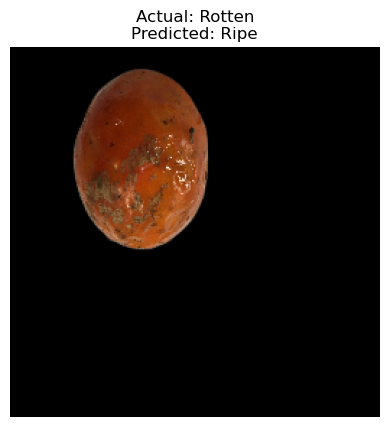

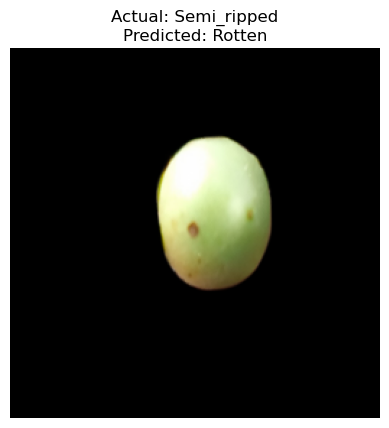

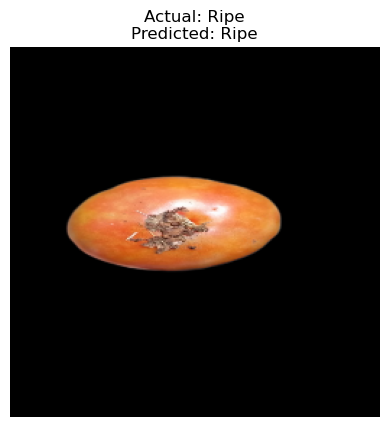

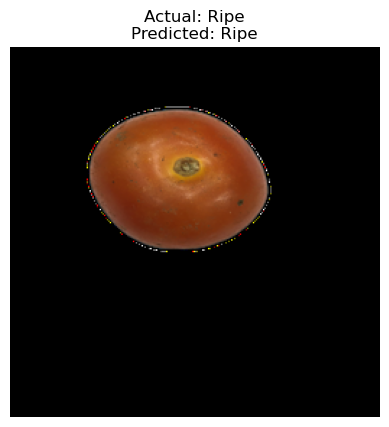

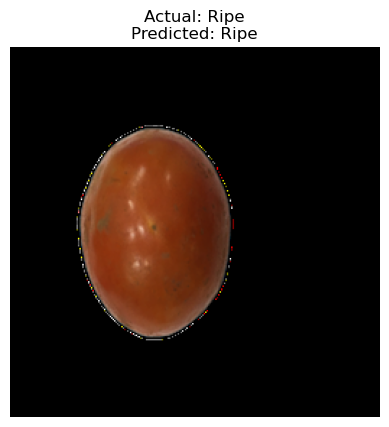

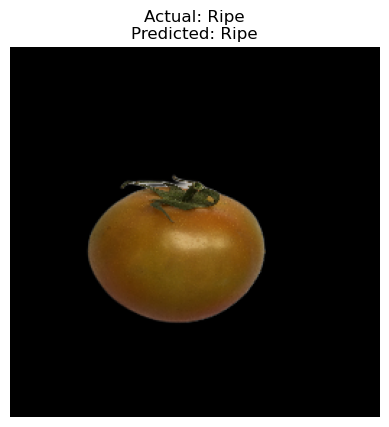

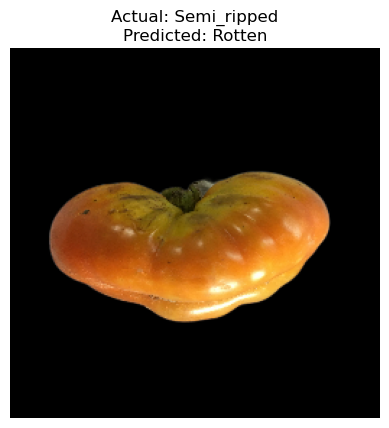

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


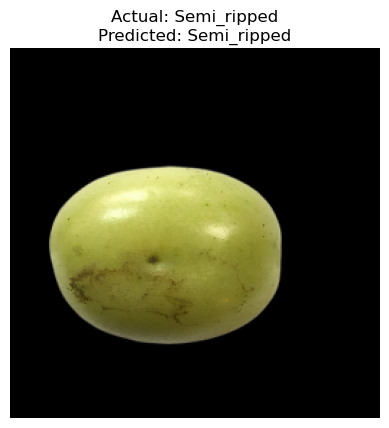

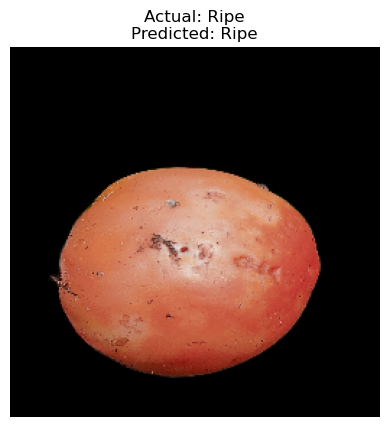

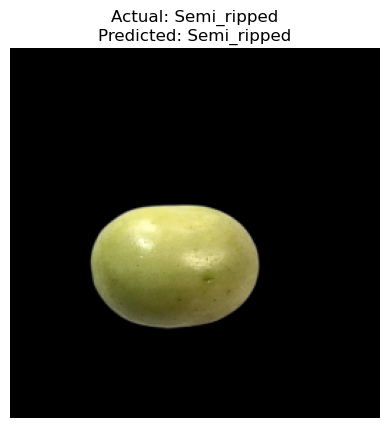

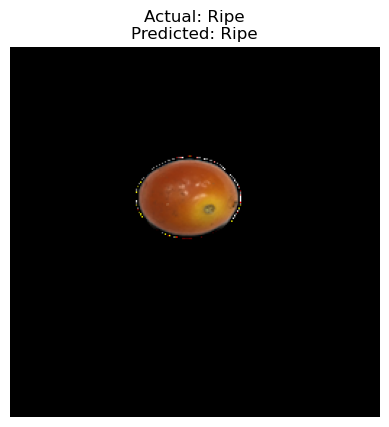

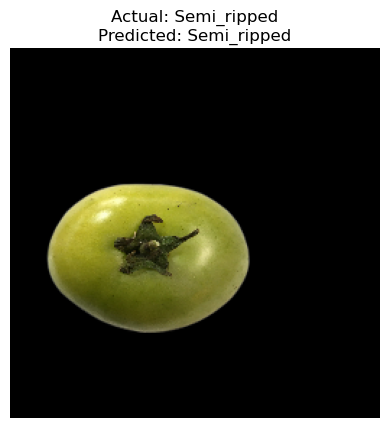

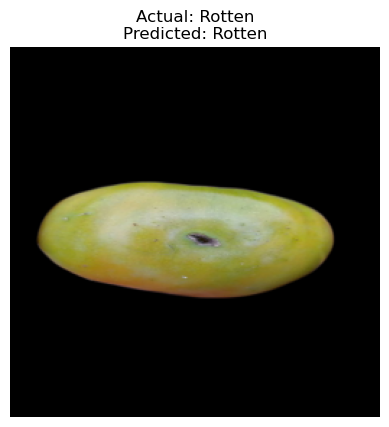

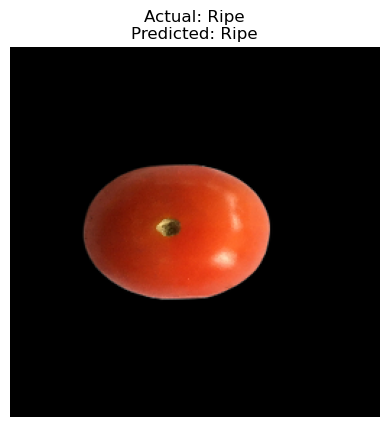

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


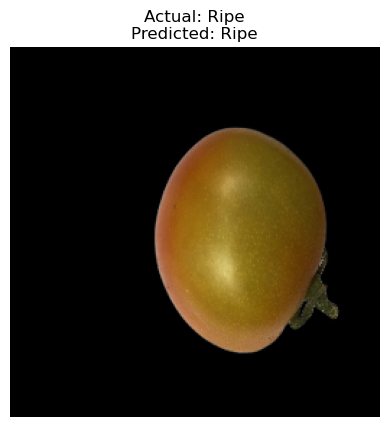

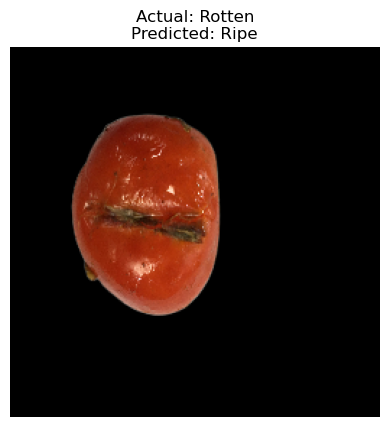

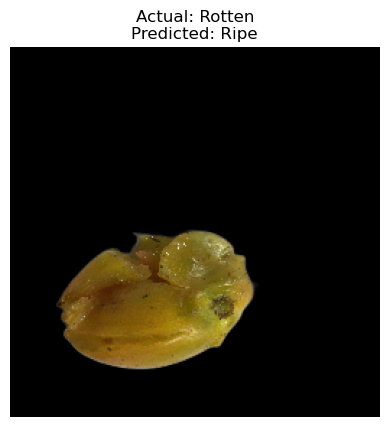

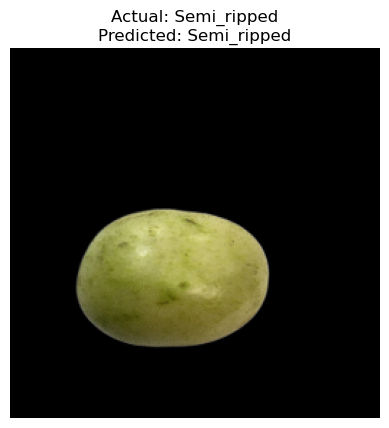

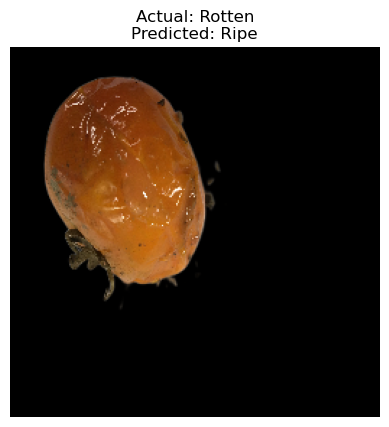

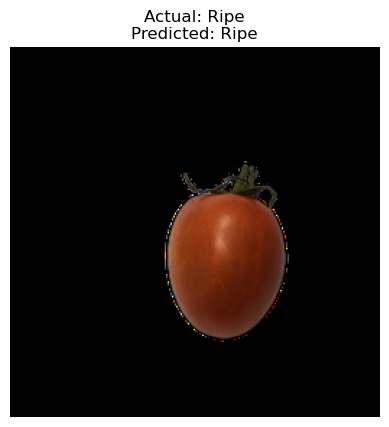

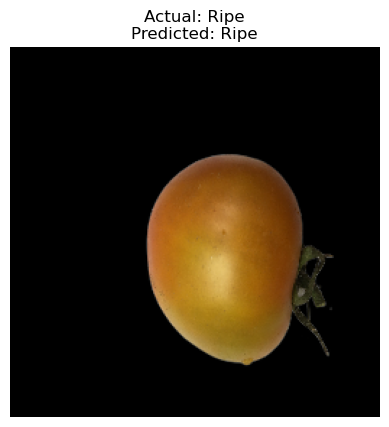

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


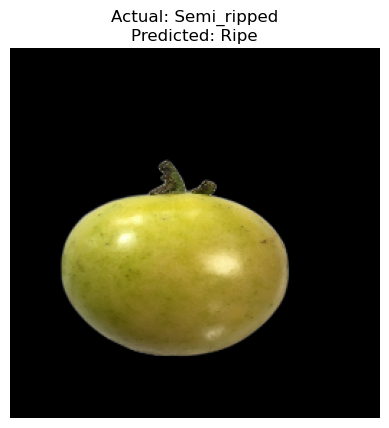

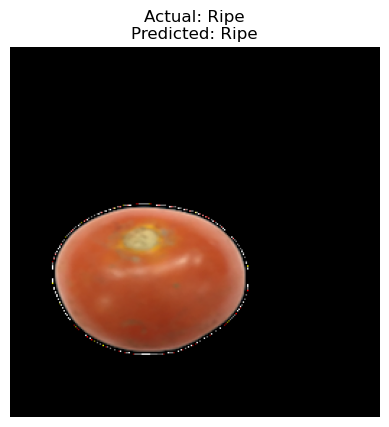

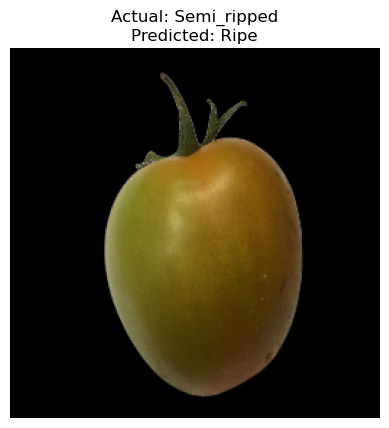

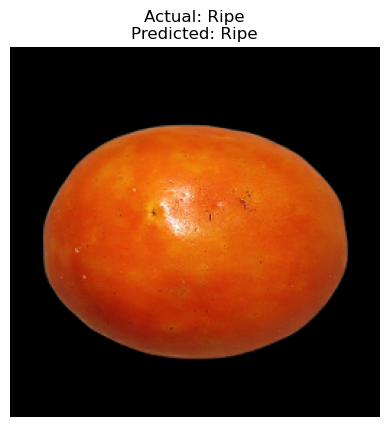

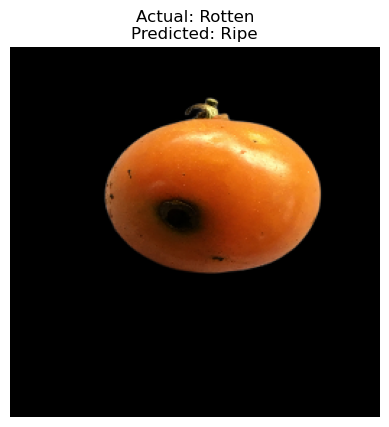

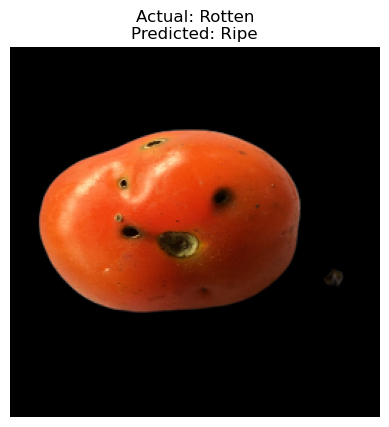

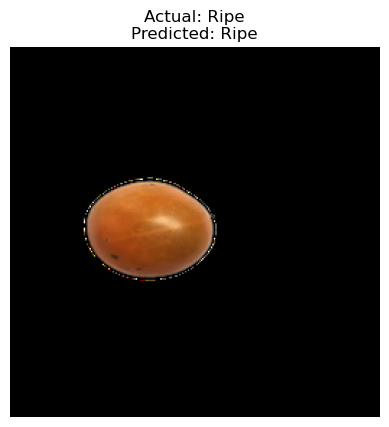

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


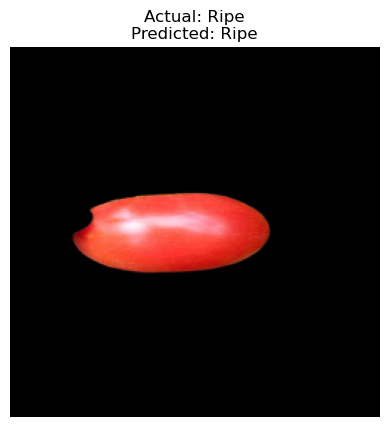

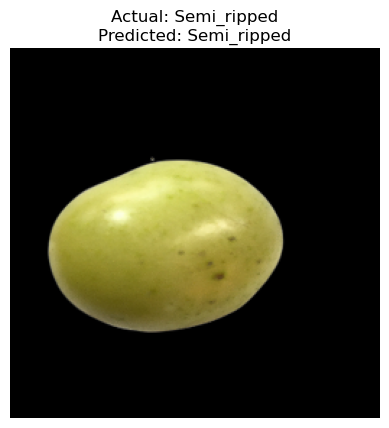

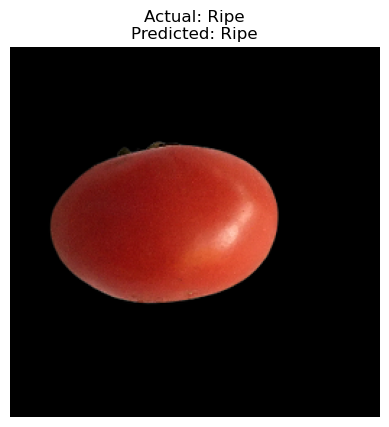

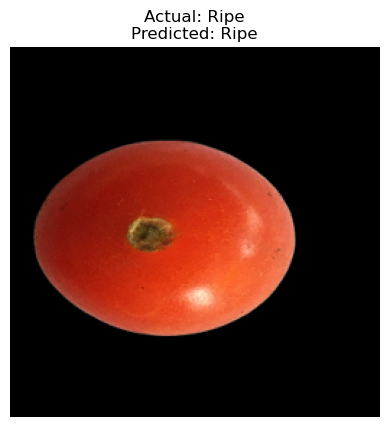

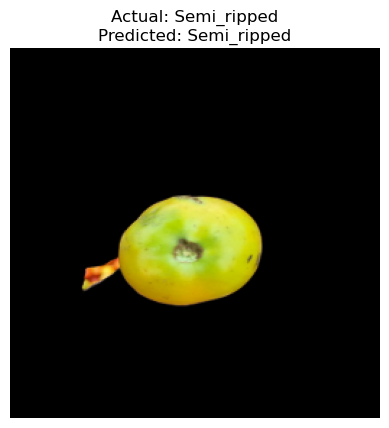

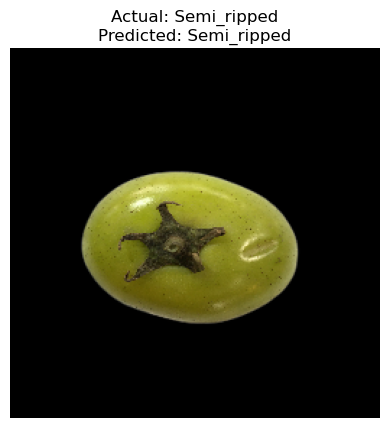

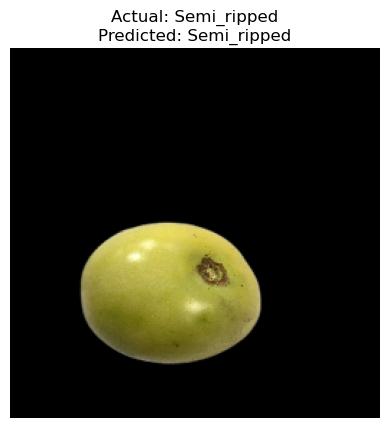

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


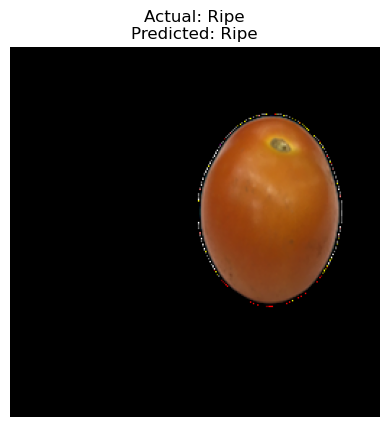

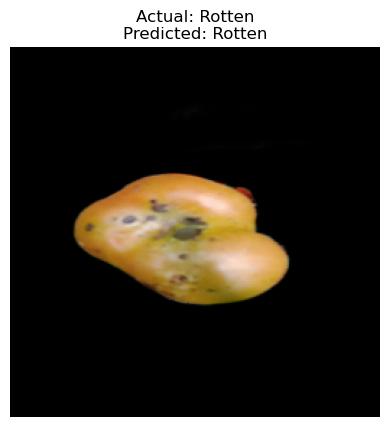

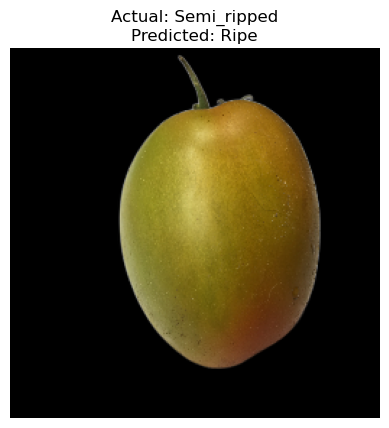

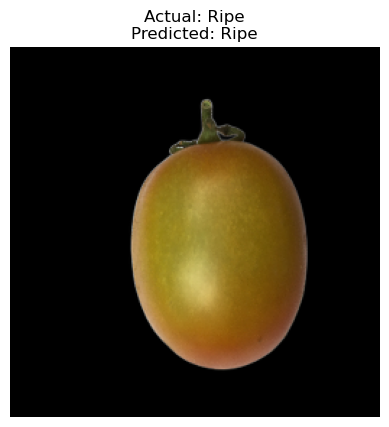

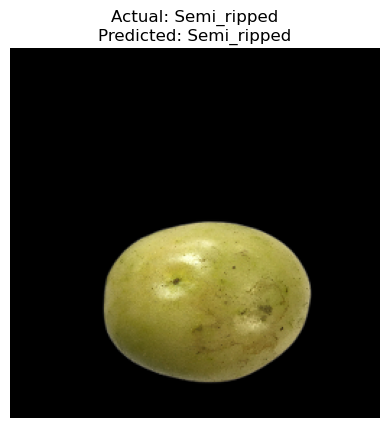

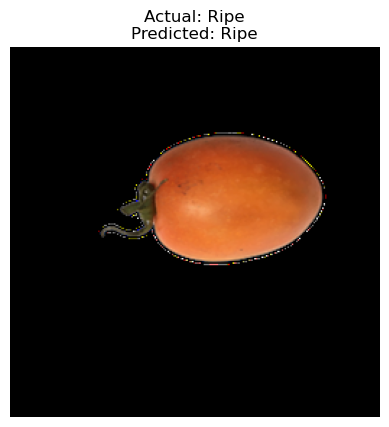

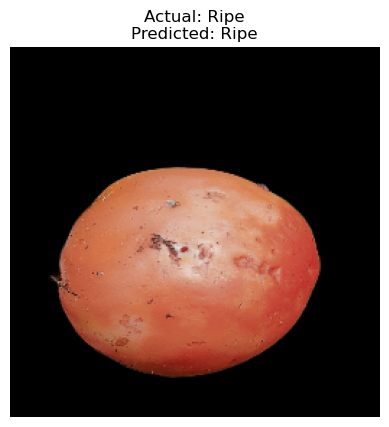

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


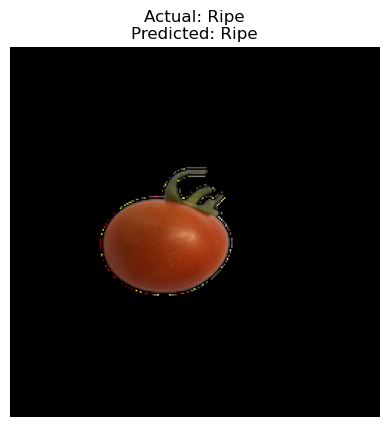

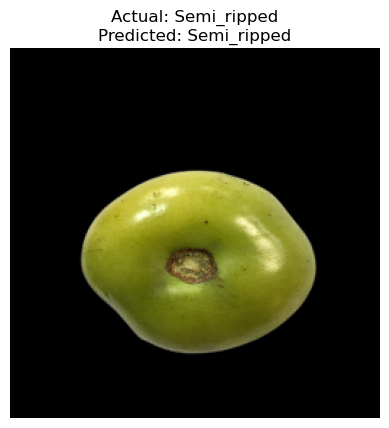

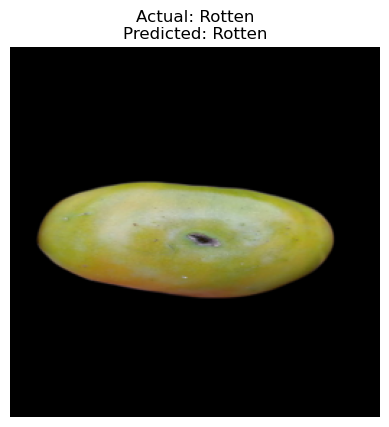

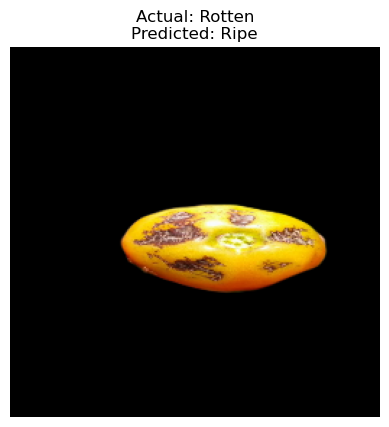

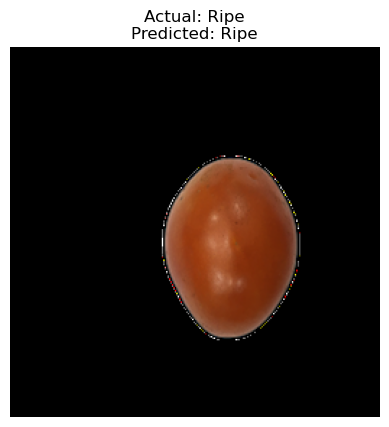

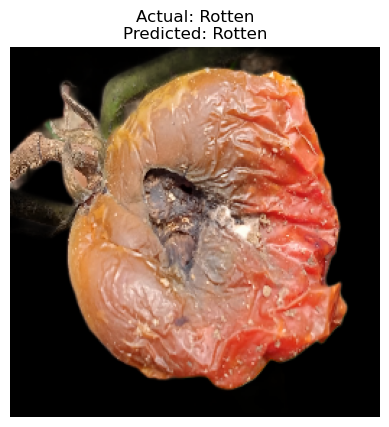

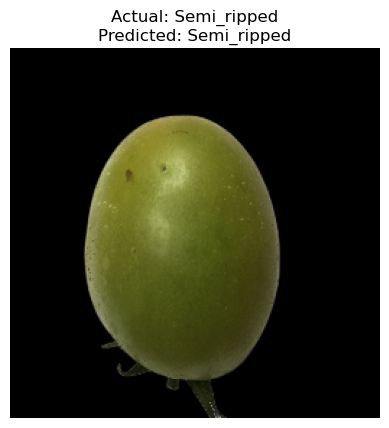

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


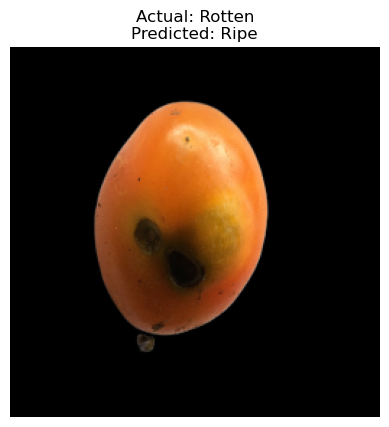

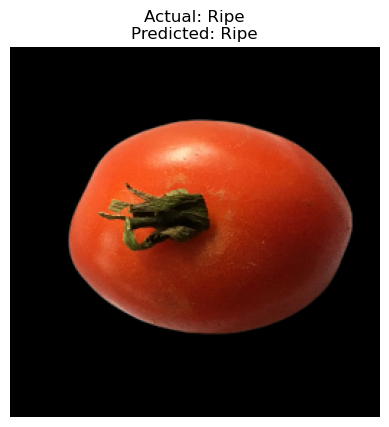

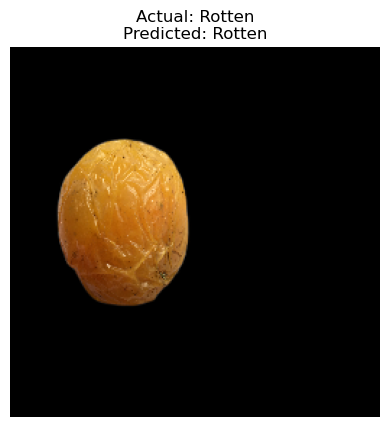

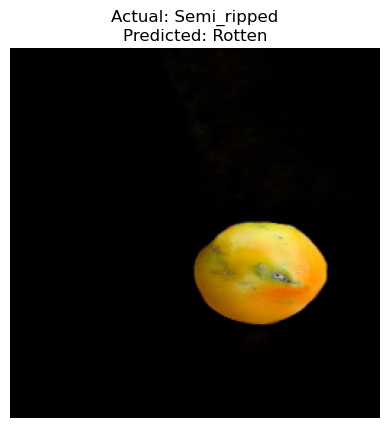

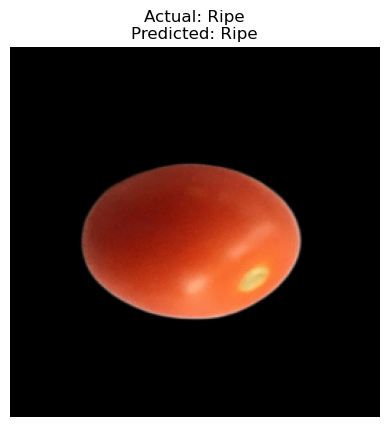

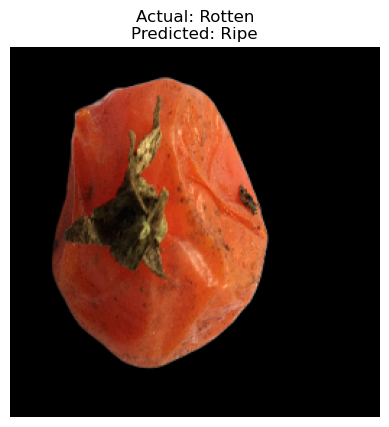

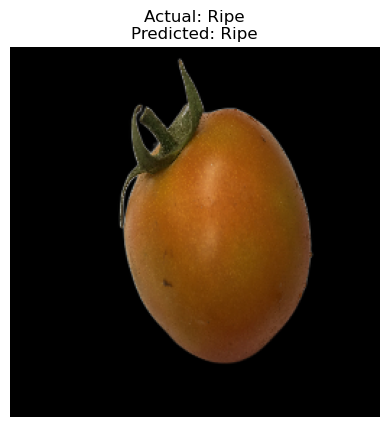

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


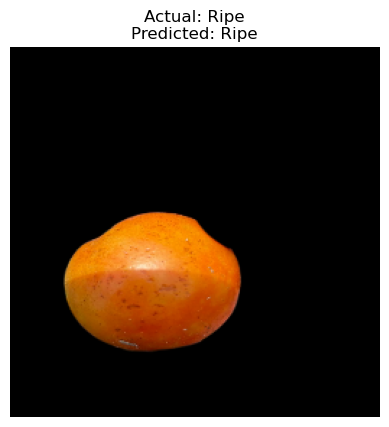

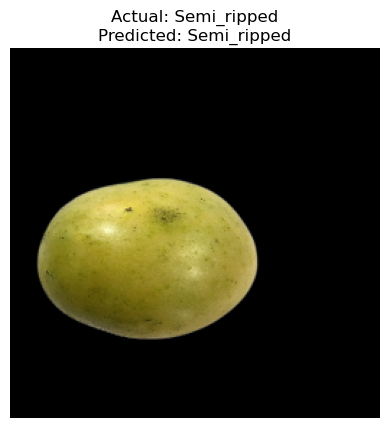

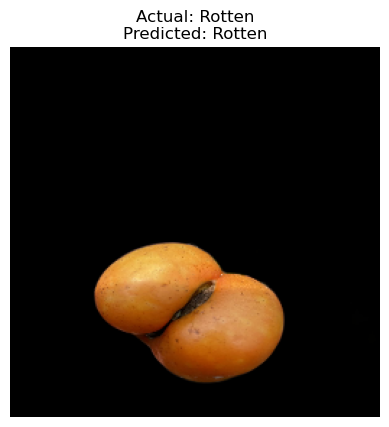

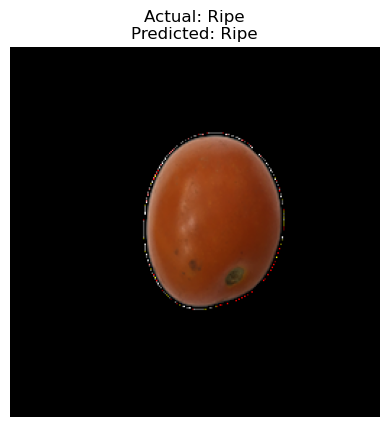

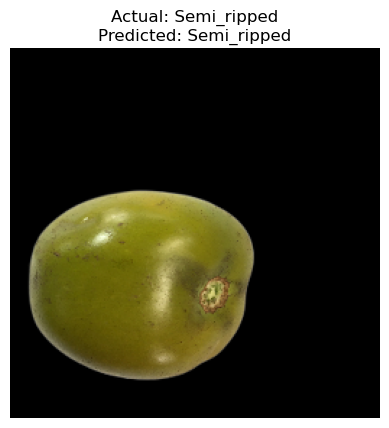

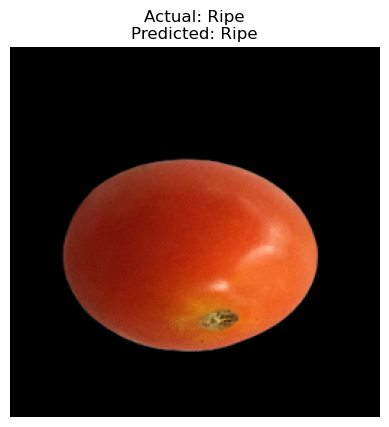

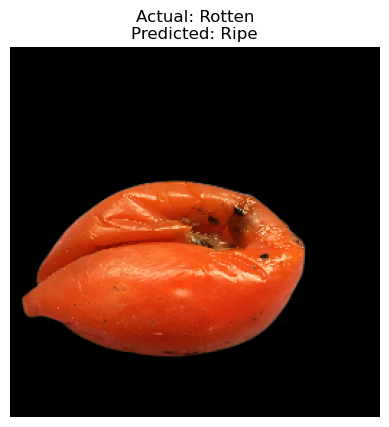

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Optional: Ensure eager execution is enabled (typically already is in TF 2.x)
tf.config.run_functions_eagerly(True)

# Loop through all batches in the test dataset
for images_batch, labels_batch in test_ds:
    # Convert batch to NumPy arrays
    images_np = images_batch.numpy().astype('uint8')
    labels_np = labels_batch.numpy()

    # Predict the batch
    batch_prediction = model.predict(images_batch)

    # Loop through each image in the batch
    for i in range(len(images_np)):
        image = images_np[i]
        label = labels_np[i]

        # Get predicted label
        predicted_index = np.argmax(batch_prediction[i])
        predicted_class = class_names[predicted_index]

        # Show the image with actual & predicted label
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Actual: {class_names[label]}\nPredicted: {predicted_class}")
        # plt.title(
        #     f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}"
        # )
        plt.show()


In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 7 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

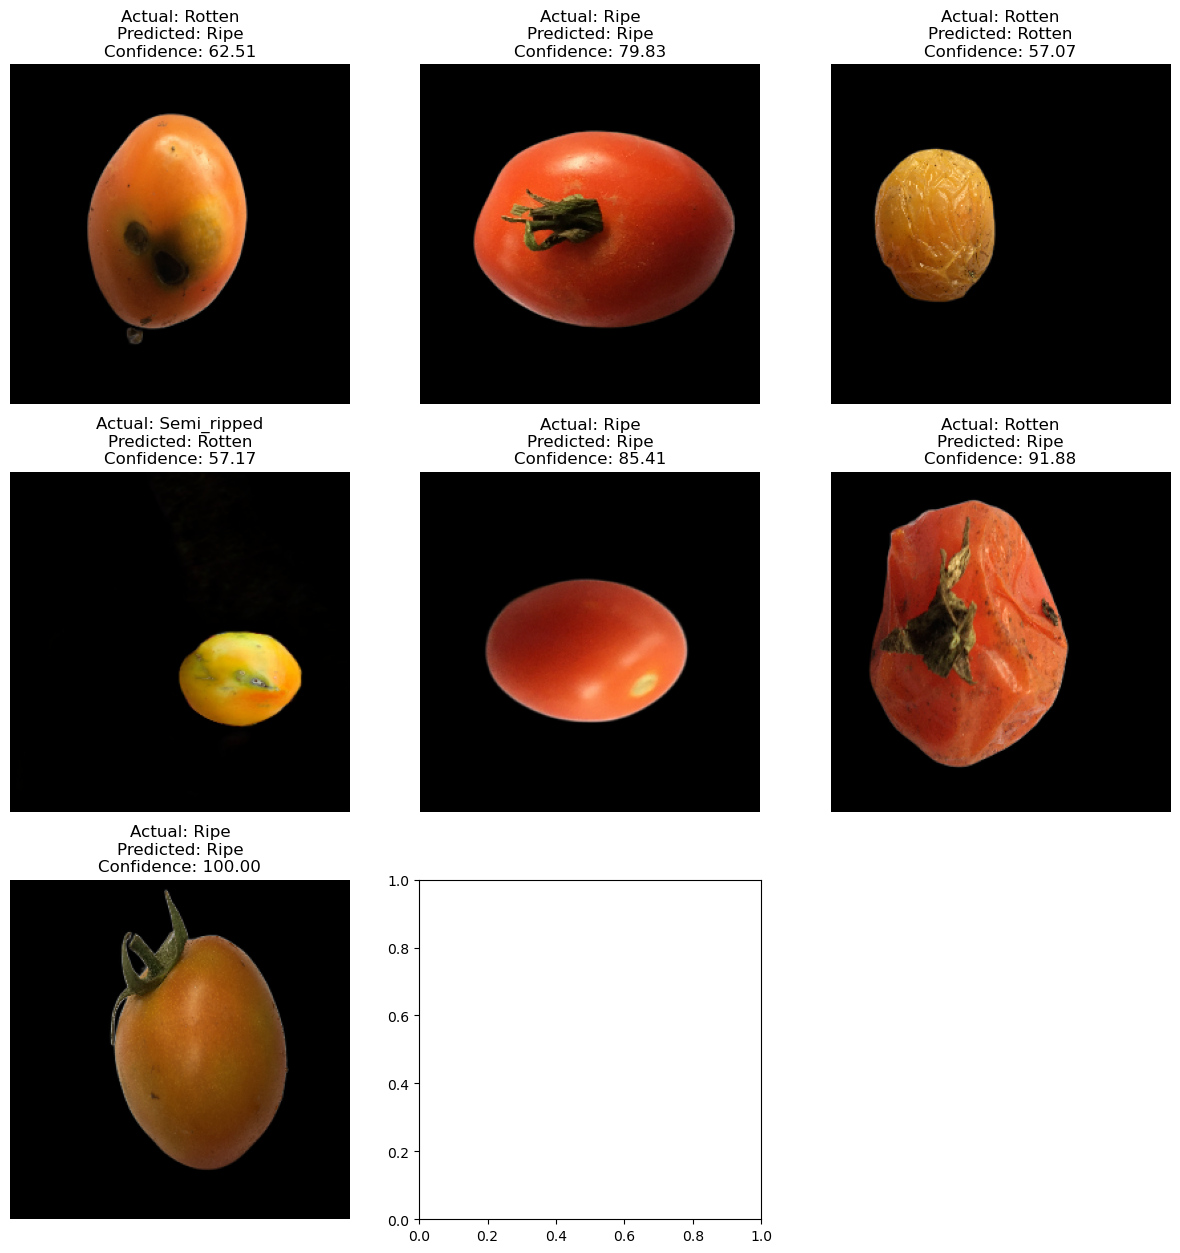

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}"
        )
        plt.axis("off")
